In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data= pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
## Finding the Null Data 
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
## Finding the O & 1 Class
## O is normal transaction & 1 is Fraud 
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
## Seperating the data for Fraud and Legal Transaction
legal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [8]:
print(legal.shape)

(284315, 31)


In [9]:
print(fraud.shape)

(492, 31)


In [10]:
## Legal transaction amount
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
## Fraud Transaction Amount
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
## Compare the Values from both Transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
## There are 492 Fraud Transaction and 284315 Legal transaction in 172792.0 seconds.

In [14]:
legal_sample = legal.sample(n=492)

In [15]:
legal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95191,65200.0,-0.578483,0.394761,0.823903,-0.732562,1.044665,-0.492679,1.389585,-0.289144,-0.765911,...,-0.247762,-0.876420,0.128208,-0.529144,-0.384726,-0.072626,-0.147890,-0.090212,84.90,0
161272,114044.0,1.844573,0.156122,-0.307747,3.839395,0.179472,0.957787,-0.442438,0.362367,-0.305871,...,0.120647,0.500548,0.130422,0.671579,0.025660,0.089162,-0.017756,-0.053438,1.51,0
144686,86326.0,-9.759245,-12.793382,-5.470780,5.187856,-14.858619,8.389511,18.585208,-1.148948,-3.693047,...,3.187310,-0.333174,12.214433,-0.267406,2.403722,-0.177034,-1.910145,0.386038,5268.04,0
93015,64217.0,1.198621,0.300851,0.409533,0.626436,-0.422543,-0.867179,-0.018846,-0.063733,-0.224984,...,-0.223653,-0.688869,0.143141,0.492522,0.155182,0.064687,-0.027359,0.022511,1.98,0
213105,139114.0,-1.556670,0.563332,-2.466572,-0.738685,2.265210,-1.000783,1.817388,-0.784848,0.414021,...,0.143112,1.768026,0.490126,0.223800,-0.923165,0.280925,-0.483237,0.016580,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192552,129754.0,2.236114,-0.511869,-2.080279,-0.895475,-0.041324,-1.711956,0.304936,-0.625108,-0.999185,...,0.361661,1.036502,-0.087879,-0.013321,0.442594,0.084730,-0.078165,-0.078742,31.00,0
193517,130168.0,-0.433480,0.408683,-2.451809,-0.016486,0.451321,-1.502470,2.316456,-0.286872,-0.686057,...,0.727278,1.831106,0.564999,0.028213,-0.939721,-0.149004,0.358949,0.314452,272.87,0
6395,7595.0,1.189370,0.329911,0.649186,1.346857,-0.202042,-0.383130,-0.098647,-0.199218,1.370183,...,-0.236436,-0.460714,-0.050675,-0.189783,0.461578,-0.491205,0.004131,0.026715,36.00,0
42326,41055.0,1.062392,-1.124741,1.169462,-0.477367,-1.723225,-0.245904,-1.023485,0.076902,-0.503939,...,0.321988,0.696852,-0.117604,0.588925,0.255359,-0.233049,0.028116,0.042811,131.90,0


In [16]:
# Concating Two data set

In [17]:
new_dataset= pd.concat([legal_sample,fraud],axis=0)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95191,65200.0,-0.578483,0.394761,0.823903,-0.732562,1.044665,-0.492679,1.389585,-0.289144,-0.765911,...,-0.247762,-0.876420,0.128208,-0.529144,-0.384726,-0.072626,-0.147890,-0.090212,84.90,0
161272,114044.0,1.844573,0.156122,-0.307747,3.839395,0.179472,0.957787,-0.442438,0.362367,-0.305871,...,0.120647,0.500548,0.130422,0.671579,0.025660,0.089162,-0.017756,-0.053438,1.51,0
144686,86326.0,-9.759245,-12.793382,-5.470780,5.187856,-14.858619,8.389511,18.585208,-1.148948,-3.693047,...,3.187310,-0.333174,12.214433,-0.267406,2.403722,-0.177034,-1.910145,0.386038,5268.04,0
93015,64217.0,1.198621,0.300851,0.409533,0.626436,-0.422543,-0.867179,-0.018846,-0.063733,-0.224984,...,-0.223653,-0.688869,0.143141,0.492522,0.155182,0.064687,-0.027359,0.022511,1.98,0
213105,139114.0,-1.556670,0.563332,-2.466572,-0.738685,2.265210,-1.000783,1.817388,-0.784848,0.414021,...,0.143112,1.768026,0.490126,0.223800,-0.923165,0.280925,-0.483237,0.016580,0.01,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


<AxesSubplot: ylabel='count'>

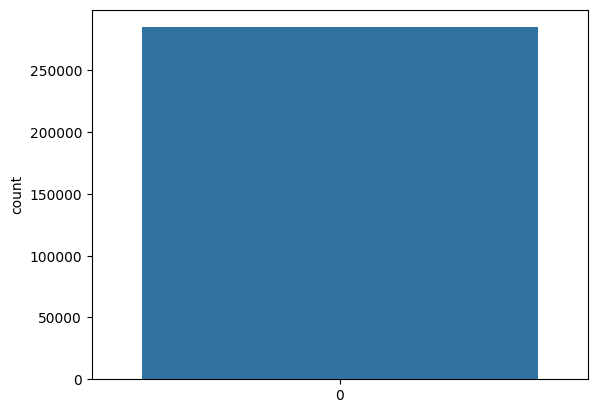

In [20]:
sns.countplot(credit_card_data['Class'])

In [21]:
x= new_dataset.drop(columns='Class',axis=1)
y = new_dataset['Class']

In [22]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
95191,65200.0,-0.578483,0.394761,0.823903,-0.732562,1.044665,-0.492679,1.389585,-0.289144,-0.765911,...,0.217120,-0.247762,-0.876420,0.128208,-0.529144,-0.384726,-0.072626,-0.147890,-0.090212,84.90
161272,114044.0,1.844573,0.156122,-0.307747,3.839395,0.179472,0.957787,-0.442438,0.362367,-0.305871,...,-0.381835,0.120647,0.500548,0.130422,0.671579,0.025660,0.089162,-0.017756,-0.053438,1.51
144686,86326.0,-9.759245,-12.793382,-5.470780,5.187856,-14.858619,8.389511,18.585208,-1.148948,-3.693047,...,11.310330,3.187310,-0.333174,12.214433,-0.267406,2.403722,-0.177034,-1.910145,0.386038,5268.04
93015,64217.0,1.198621,0.300851,0.409533,0.626436,-0.422543,-0.867179,-0.018846,-0.063733,-0.224984,...,-0.082703,-0.223653,-0.688869,0.143141,0.492522,0.155182,0.064687,-0.027359,0.022511,1.98
213105,139114.0,-1.556670,0.563332,-2.466572,-0.738685,2.265210,-1.000783,1.817388,-0.784848,0.414021,...,-0.483227,0.143112,1.768026,0.490126,0.223800,-0.923165,0.280925,-0.483237,0.016580,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
y

95191     0
161272    0
144686    0
93015     0
213105    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=0.2, stratify=y, random_state=2)

In [25]:
print(x.shape, x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [26]:
y.shape, y_test.shape

((984,), (197,))

### Model Traininig

In [27]:
model = LogisticRegression()

##### Training wiTh Logistic Regression Model

In [28]:
model.fit(x_train,y_train)

C:\Users\APEX\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

######  Accuracy on Training data

In [29]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [30]:
training_data_accuracy

0.9466327827191868

#### Accuracy on Test Data

In [31]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [32]:
test_data_accuracy

0.949238578680203